In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
data_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/'
plot_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'

In [3]:
# file_names =[ 'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']
             #'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']

    #'otu_BatchCorrected_bmi_corrected_pearson_and_mse'
#'kmer_kmer_table_bmi_corrected_pearson_and_mse',

#['bmi_corrected_pearson_and_mse','bmi_corrected_pearson_and_mse']
# folder_names = ['AGP_Hfilter_otu','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k']
# file_names =[ 'otu_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc']

# nice_names = ["OTU","KMER","KMER"]
select_columns_bool = False
select_labels =[0,0,0,0,6,7,7]#[0,1,2,3,4,5,6,7,8,9,10]##[0.20,0.40,0.60,0.80]#["raw","ComBat","BMC","limma","SmartSVA (sv=1)","MINERVA (sv=1)"]# ["5-mer","6-mer","7-mer"]#

#[0,1,2,3,10,20,40,60,80,100,140,150,200,220,240,260,300]#[0,1,2,3,10,20,30,40,50, 60, 70, 80 ,10]#
lin_model = "reg"
phen = "bin_crc_adenomaORnormal"# "bmi_corrected" #"bin_antibiotic_last_year"#"bin_crc_normal"#"""bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
phen_pretty = "colorectal cancer status"#"BMI"#"antibiotic history" #"bmi"#"colorectal cancer status"#"Preterm Birth"#"
phen_type = "class"
not_rotate = False
data_type = "kmer"
trans = "clr_scale" #[0,0,0,0,1,1]#
numPc = [0,1,2,3,4,5,6,7,8,9,10]##[20,30,40,50,60,70,80,90,100,110,120,130,150,200]#[0,0,0,0,3,1,2]#[0,1,2,3,4,5,6,7,8,9,10]###,20,30,40,50,100,120,140] #[0,0,0,0,10,10,1] # [0
folder_names = ['CRC_k7' for i in range(len(numPc))]
#folder_names = ['AGP_max_k6_subsample_' + str(i) + '_seed_1' for i in [20,40,60,80]]
#['CRC_k6' for i in range(len(numPc))]#
# ["AGP_max_k5","AGP_max_k6","AGP_max_k7"]#,"AGP_max_k8"]#['AGP_max_k7' for i in range(len(numPc))]
#file_names = ['rawfilter_TRUE','smartsva_first2filter_TRUE','minerva_first2filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]

#file_names = ['rawfilter_TRUE']+['mine3rva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))] 
#+['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))] 
#file_names =['rawfilter_TRUE' for i in range(0,len(numPc))] 

#file_names =['rawfilter_TRUE']+['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
#file_names = ['rawfilter_TRUE']+['refactor_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
#
# file_names = ['rawfilter_TRUE','ComBatfilter_TRUE','bmcfilter_TRUE','limmafilter_TRUE',
#              'smartsva_first1filter_TRUE','minerva_first1filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
#'bmcfilter_TRUE','limmafilter_TRUE', ''refactor_first2filter_TRUE',
#file_names = ['rawfilter_TRUE','ComBatfilter_TRUE','bmcfilter_TRUE','limmafilter_TRUE', 'smartsva_first6filter_TRUE','refactor_first7filter_TRUE','minerva_first7filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
#file_names = ['rawfilter_TRUE']+ ['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
#file_names = ['rawfilter_TRUE']+ ['refactor_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]

file_names = [f + "_trans_" + trans for f in file_names]
nice_names = ["6" + '-mer' for i in range(len(numPc))]

# file_names =[ 'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#             'kmer_BatchCorrected_antibiotic_classification_auc']
#folder_names = ['AGP_Hfilter_k5/robust_k','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k','AGP_Hfilter_k8/robust_k']

#folder_names = ['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7'] #,'AGP_otumatch_k7']#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7']
#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#nice_names = ["5-mer","6-mer","7-mer","8-mer"] #,"KMER"]#, 'KMER old batch correct','KMER MINERVA']

if phen_type == "cont":
    
    metric_word = 'pearson' # 'auc_all'#'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bmi_prediction' #'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier = 'Regression'# "Random Forest"##"Random Forest"#'Regression'#"Random Forest"
    classifier_ofc = "Lin"
    title = 'Pearson correlation of predicted body mass index (BMI)'# 'AUC for prediction of antibiotic history'#'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = phen #"Antibiotic history class prediction"#"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 
else:
    metric_word =  'auc_all'#'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier_ofc = "Mixed"
    classifier = ["Naive Bayes" for f in file_names]#"Naive Bayes"#""Naive Bayes"#Random Forest"#Random Forest"#"#'Regression'#"Random Forest"

    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = phen #"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 


In [4]:
folder_names

['CRC_k7',
 'CRC_k7',
 'CRC_k7',
 'CRC_k7',
 'CRC_k7',
 'CRC_k7',
 'CRC_k7',
 'CRC_k7',
 'CRC_k7',
 'CRC_k7',
 'CRC_k7']

In [5]:
len(file_names)

11

In [6]:
folder_names

['CRC_k7',
 'CRC_k7',
 'CRC_k7',
 'CRC_k7',
 'CRC_k7',
 'CRC_k7',
 'CRC_k7',
 'CRC_k7',
 'CRC_k7',
 'CRC_k7',
 'CRC_k7']

In [7]:
df_metric = pd.DataFrame()

In [8]:
phen

'bin_crc_adenomaORnormal'

In [9]:

for f in range(len(file_names)):
    
    if metric_word == 'pearson':
        # "_lin_model_" + lin_model + "/cont_pred/"
        filename_temp = data_folder + folder_names[f] +"/"+ data_type + "_BatchCorrected_" + phen + "_"+ file_names[f] +"_pearson_and_mse.pkl"
        
    else:
        filename_temp = data_folder + folder_names[f] + "/"+ data_type + "_BatchCorrected_"+ phen + "_" + file_names[f] + "_classification_auc.pkl"
    print(filename_temp)
    if os.path.isfile(filename_temp):
        
        data_temp = pickle.load( open( filename_temp ,"rb"))
    
        #methods_lists.append([k for k in data1.keys()]) 
        
        if metric_word == "auc_all":
            #index = folder_names[f]
            index = nice_names[f] + "_first_" + str(numPc[f])
            
            df_metric[index] = pd.Series(data_temp[file_names[f]][classifier[f]][metric_word])
            #nice_names[f] + "_first_" + str(numPc[f])
        else:
            #ndex = folder_names[f]
            index = file_names[f]
            df_metric[index] = pd.Series(data_temp[metric_word])
    else:
        print("not file")
        print(file_names[f])
        df_metric[nice_names[f] + file_names[f]] = 0
        df_metric[nice_names[f] + file_names[f]] = 0
        
    

/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/CRC_k7/kmer_BatchCorrected_bin_crc_adenomaORnormal_rawfilter_TRUE_trans_clr_scale_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/CRC_k7/kmer_BatchCorrected_bin_crc_adenomaORnormal_minerva_first1filter_TRUE_trans_clr_scale_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/CRC_k7/kmer_BatchCorrected_bin_crc_adenomaORnormal_minerva_first2filter_TRUE_trans_clr_scale_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/CRC_k7/kmer_BatchCorrected_bin_crc_adenomaORnormal_minerva_first3filter_TRUE_trans_clr_scale_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/CRC_k7/kmer_BatchCorrected_bin_crc_adenomaORnormal_minerva_first4filter_TRUE_trans_clr_scale_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/CRC_k7/kmer_BatchCorrected_bin_crc_adenomaORnormal_minerva_first5filter_TRUE_

In [10]:
file_names

['rawfilter_TRUE_trans_clr_scale',
 'minerva_first1filter_TRUE_trans_clr_scale',
 'minerva_first2filter_TRUE_trans_clr_scale',
 'minerva_first3filter_TRUE_trans_clr_scale',
 'minerva_first4filter_TRUE_trans_clr_scale',
 'minerva_first5filter_TRUE_trans_clr_scale',
 'minerva_first6filter_TRUE_trans_clr_scale',
 'minerva_first7filter_TRUE_trans_clr_scale',
 'minerva_first8filter_TRUE_trans_clr_scale',
 'minerva_first9filter_TRUE_trans_clr_scale',
 'minerva_first10filter_TRUE_trans_clr_scale']

In [11]:
filename_temp

'/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/CRC_k7/kmer_BatchCorrected_bin_crc_adenomaORnormal_minerva_first10filter_TRUE_trans_clr_scale_classification_auc.pkl'

In [12]:
df_metric.shape


(50, 11)

In [13]:
df_metric
#df_metric.sort_values('OTUraw')
#In this example, there are NO 

,6-mer_first_0,6-mer_first_1,6-mer_first_2,6-mer_first_3,6-mer_first_4,6-merminerva_first5filter_TRUE_trans_clr_scale,6-mer_first_6,6-mer_first_7,6-mer_first_8,6-mer_first_9,6-mer_first_10
0,0.682292,0.694444,0.700347,0.700694,0.742188,0,0.657292,0.681597,0.692014,0.684028,0.722743
1,0.603993,0.720833,0.761111,0.788542,0.791319,0,0.777778,0.768229,0.780035,0.788021,0.785243
2,0.727528,0.702949,0.742978,0.722086,0.706110,0,0.731917,0.727001,0.697507,0.698560,0.691362
3,0.664371,0.693367,0.699710,0.706415,0.685756,0,0.702428,0.700254,0.665458,0.686843,0.665096
4,0.712215,0.695904,0.694092,0.673251,0.666183,0,0.750091,0.753353,0.773469,0.766945,0.764589
5,0.631944,0.673611,0.750694,0.678993,0.703472,0,0.675174,0.662847,0.673611,0.677778,0.700347
6,0.700000,0.714236,0.724306,0.747569,0.741667,0,0.717361,0.750694,0.747222,0.708160,0.736458
7,0.661517,0.686798,0.686798,0.767556,0.748244,0,0.724544,0.709270,0.694522,0.687500,0.692942
8,0.654585,0.633744,0.616890,0.708771,0.710765,0,0.683219,0.689924,0.748097,0.753715,0.749366
9,0.629757,0.703697,0.772744,0.699166,0.689018,0,0.711852,0.732693,0.720188,0.710040,0.705509


In [14]:
file_names

['rawfilter_TRUE_trans_clr_scale',
 'minerva_first1filter_TRUE_trans_clr_scale',
 'minerva_first2filter_TRUE_trans_clr_scale',
 'minerva_first3filter_TRUE_trans_clr_scale',
 'minerva_first4filter_TRUE_trans_clr_scale',
 'minerva_first5filter_TRUE_trans_clr_scale',
 'minerva_first6filter_TRUE_trans_clr_scale',
 'minerva_first7filter_TRUE_trans_clr_scale',
 'minerva_first8filter_TRUE_trans_clr_scale',
 'minerva_first9filter_TRUE_trans_clr_scale',
 'minerva_first10filter_TRUE_trans_clr_scale']

In [15]:
select_columns = df_metric.columns #[ i + 'clr_pca_regress_out_no_scale_first10' for i in nice_names ] 
#select_labels = ["raw","ComBat","BMC","limma","SmartSVA","Refactor","MINERVA"]
#select_labels = numPc
#select_labels = ["raw","MINERVA","Refactor","SmartSVA"]


# ['Refactor CLR 100 SVs','Refactor CLR 220 SVs','MINERVA 100 SVs','MINERVA 220 SVs', 
#                  "Refactor 120 SVs", "SmartSVA CLR 220 SVs","SmartSVA 120 SVs"]

# select_labels = ["MINERVA no std 10 SVs", "MINERVA std 10 SVs","SmartSVA 10 SVs", 
#                  "MINERVA no std 5 SVs", "MINERVA std 5 SVs","SmartSVA 5 SVs"]






#[ i + ' MINERVA' for i in nice_names ] 

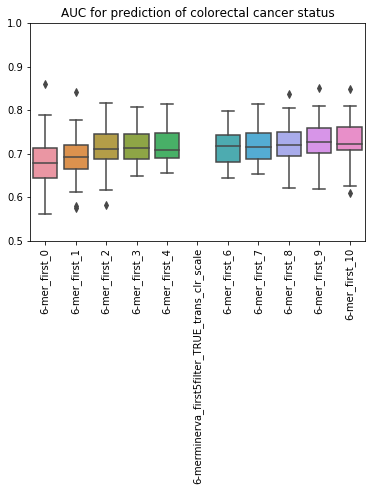

In [16]:
# ['6-mers norm', '6-mers no_scale_clr','6-mers scale_clr','7-mers norm','7-mers no_scale_clr','7-mers scale_clr']
# ['6-mers Raw', '6-mers MINVERVA','6-mers MINERVA-scale', '7-mers Raw','7-mers MINVERVA','7-mers MINVERVA-scale']
# Make boxplot for one group only

current_palette = sns.color_palette()
#sns.palplot(current_palette)
palette = sns.color_palette("hls", 8)
plot_color = palette.as_hex()


# select_columns = ['7-merclr_pca_regress_out_no_scale_first10filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first10filter_FALSE',
#        '7-mersmartsva_first10filter_FALSE',
#        '7-merclr_pca_regress_out_no_scale_first5filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first5filter_FALSE',
#        '7-mersmartsva_first5filter_FALSE']

# select_labels = ["KMER MINERVA "]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma','KMERraw',
#                   'KMERbmc','KMERComBat','KMERlimma',"KMERsmartsva_first10",
#                   "KMERrefactor_first10", "KMERclr_pca_regress_out_no_scale_first10"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"] #clr_pca_regress_out_no_scale_first10

# ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'OTUclr_pca_regress_out_no_scale',"KMERnorm","KMERno_scale_clr"]

# select_labels = ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer BMC", "K-mer ComBat",
#                 "K-mer limma","K-mer smartsva","K-mer refactor","K-mer MINERVA"]
#['OTU raw','OTU BMC','OTU ComBat','OTU limma',"OTU MINERVA","K-mer raw", "K-mer MINERVA"]


# ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer ComBat","K-mer smartsva*",
#                                     "K-mer MINERVA"]
if select_columns_bool:
    g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
    #plot_color[0:4] + [plot_color[7]] + [plot_color[4]] + [plot_color[7]
    if not_rotate:
        g.set_xticklabels(labels = select_labels) #df_metric.columns
    else:
        g.set_xticklabels(rotation=90,labels = select_labels) #df_metric.columns
else:
    g=sns.boxplot( data = df_metric)
    g.set_xticklabels(rotation=90,labels = df_metric.columns)
if metric_word == "pearson":
    g.set(ylim=(-0.1, 0.3))
else:
    g.set(ylim=(0.5,1))
g.set_title(title)
plt.savefig(plot_folder + data_type + "_" + trans + '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '.pdf',bbox_inches='tight')
plt.savefig(plot_folder + data_type + "_" + trans +  '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '.png',bbox_inches='tight')




In [17]:
df_metric.mean(axis=0)

6-mer_first_0                                     0.682051
6-mer_first_1                                     0.692231
6-mer_first_2                                     0.711848
6-mer_first_3                                     0.717009
6-mer_first_4                                     0.718947
6-merminerva_first5filter_TRUE_trans_clr_scale    0.000000
6-mer_first_6                                     0.716003
6-mer_first_7                                     0.720363
6-mer_first_8                                     0.723389
6-mer_first_9                                     0.726740
6-mer_first_10                                    0.726665
dtype: float64

In [18]:
plot_folder

'/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'